In [ ]:
import import_ipynb
import stationarity
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

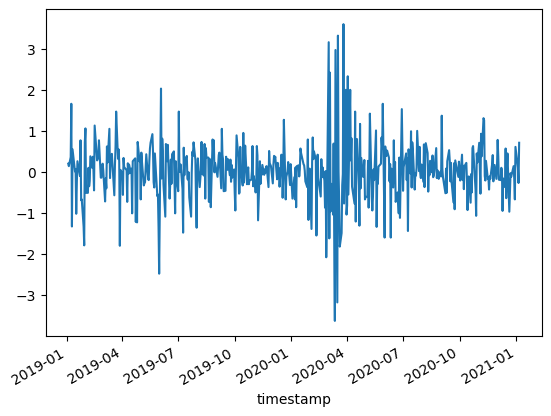

In [2]:
VZ_diff = stationarity.VZ_diff
VZ_diff.plot();

### Plotting acf to determine best model order 

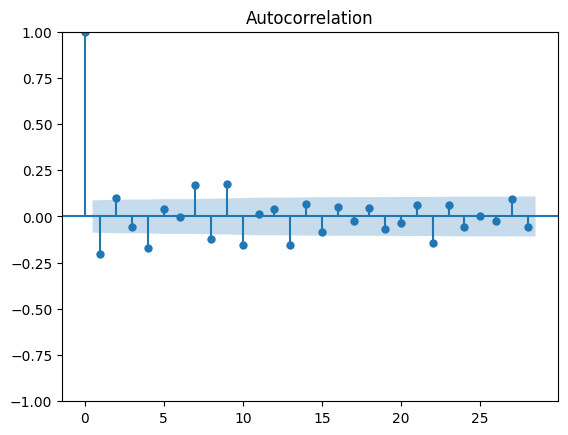

In [3]:
plot_acf(VZ_diff);

### Moving Average (MA) model

In [4]:
def ma_model(diff_df, order):
    model = ARIMA(diff_df, order = order)
    results = model.fit()
    print(results.summary());
    print(results.params[1])
    return results

In [5]:
MA1 = ma_model(VZ_diff, (0,0,1))

                               SARIMAX Results                                
Dep. Variable:                     VZ   No. Observations:                  507
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -550.371
Date:                Tue, 14 Mar 2023   AIC                           1106.742
Time:                        13:37:35   BIC                           1119.428
Sample:                             0   HQIC                          1111.717
                                - 507                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.027      0.223      0.824      -0.048       0.060
ma.L1         -0.1836      0.028     -6.596      0.000      -0.238      -0.129
sigma2         0.5133      0.018     28.708      0.0

In [6]:
MA22 = ma_model(VZ_diff, (0,0,22))

                               SARIMAX Results                                
Dep. Variable:                     VZ   No. Observations:                  507
Model:                ARIMA(0, 0, 22)   Log Likelihood                -511.173
Date:                Tue, 14 Mar 2023   AIC                           1070.347
Time:                        13:37:44   BIC                           1171.831
Sample:                             0   HQIC                          1110.145
                                - 507                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.013      0.534      0.593      -0.019       0.033
ma.L1         -0.1626      0.035     -4.627      0.000      -0.231      -0.094
ma.L2          0.0630      0.036      1.729      0.0

### Predictions using MA model

In [7]:
def plot_prediction(y_test, y_pred, model_order):
    fig, ax = plt.subplots();
    y_test.plot(ax=ax)
    plot_predict(y_pred, start=y_test.index[0], end=y_test.index[-1], ax=ax)
    plt.title("Prediction with MA("+ model_order+ ") model")
    plt.show()

In [8]:
def rmse(y_test, y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

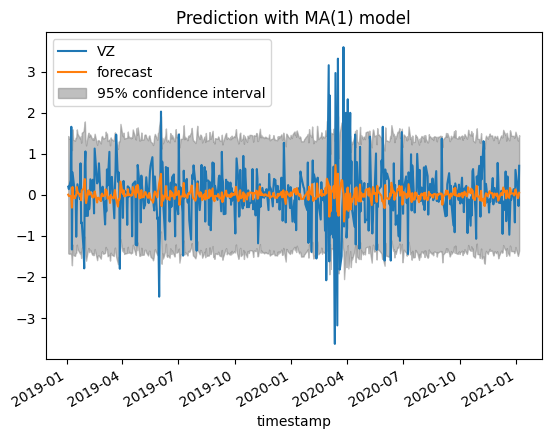

RMSE:  0.7164654235812556


In [9]:
plot_prediction(VZ_diff, MA1, "1")
print("RMSE: ",rmse(VZ_diff, MA1.fittedvalues))

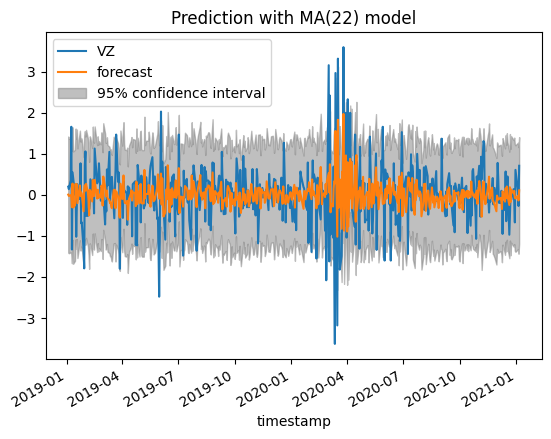

RMSE:  0.6635078048887956


In [10]:
plot_prediction(VZ_diff, MA22, "22")
print("RMSE: ",rmse(VZ_diff, MA22.fittedvalues))